In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# Intro

The following analysis is about a fast food company which plans to add a new item to its menu. To successfully launch the new item, the company is considering three marketing campaigns to promote the new product.

To determine which campaign(s)/promotion(s) is/are the most effective, success is measured by how much revenue the new items generate based on the promotion/campaign type (1, 2 or 3).

The new items are introduced in randomly selected markets and locations. Each location will host a single campaign.

# Data Cleaning

In [2]:
file='/Users/alexandergandji/Desktop/Course_Folder/Case Study/Hypothesis Test/Fast Food Marketing/WA_Marketing_Campaign.csv'
df=pd.read_csv(file)
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


Next, we want to get an idea of what kind of data set we are dealing with:

In [3]:
print('Unique values', df.MarketID.unique(),'for MarketID')
print('Unique values', df.MarketSize.unique(),'for MarketSize')
print('Unique values', df.AgeOfStore.unique(),'for AgeOfStore')
print('Unique values', df.Promotion.unique(),'for Promotion')
print('Unique values', df.week.unique(),'for week')

Unique values [ 1  2  3  4  5  6  7  8  9 10] for MarketID
Unique values ['Medium' 'Small' 'Large'] for MarketSize
Unique values [ 4  5 12  1 10 15  6 22  8 19 11 13  3  7  2 23  9 28 25 14 24 18 27 17
 20] for AgeOfStore
Unique values [3 2 1] for Promotion
Unique values [1 2 3 4] for week


- The data shows that we have ten different markets.

- We have different market sizes from 'Small' to 'Large'.

- We have an age range of the stores.

- We have three campaign types, which only ran at a location for up to four weeks.


Next, we check for any null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [5]:
df.isnull().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

As we can see, we do not have any null values, and all data types make sense. This data set is well prepared, but in real life, there is always some sort of cleaning required.

In [6]:
col={'MarketID':'marketid', 'MarketSize':'marketsize', 'LocationID':'locationid',
    'AgeOfStore':'ageofstore', 'Promotion':'promotion', 'week':'week',
     'SalesInThousands':'promo_revenue'}
df=df.rename(columns=col)
df['promo_revenue']=df.promo_revenue*1000

# Exploratory Analysis

In [7]:
df.head()

,marketid,marketsize,locationid,ageofstore,promotion,week,promo_revenue
0,1,Medium,1,4,3,1,33730.0
1,1,Medium,1,4,3,2,35670.0
2,1,Medium,1,4,3,3,29030.0
3,1,Medium,1,4,3,4,39250.0
4,1,Medium,2,5,2,1,27810.0


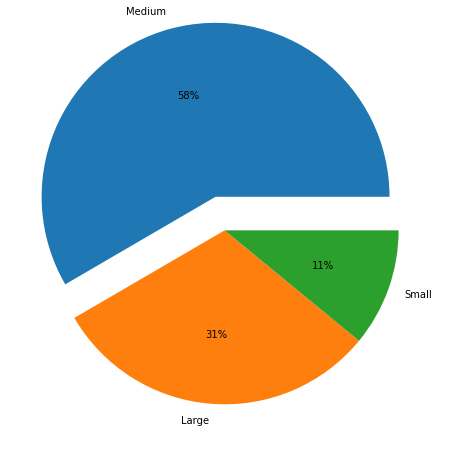

None
marketsize
Medium    80
Large     42
Small     15
Name: locationid, dtype: int64


In [8]:
#number of location in marketsizes
df.groupby('marketsize')['locationid'].nunique().sort_values(ascending=False).plot(kind='pie',
                                                                    figsize=(8,8),
                                                                    autopct='%1.0f%%',
                                                                    explode=(0.2,0,0))
plt.ylabel('')
print(plt.show())
print(df.groupby('marketsize')['locationid'].nunique().sort_values(ascending=False))

As we can see, the majority of the locations are medium sized

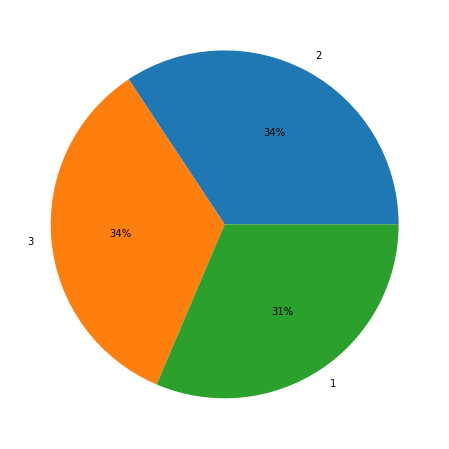

None
promotion
1    172
2    188
3    188
Name: marketsize, dtype: int64


In [9]:
#number of promotions in marketsizes
df.groupby('promotion')['marketsize'].count().sort_values(ascending=False).plot(kind='pie',
                                                                    figsize=(8,8),
                                                                    autopct='%1.0f%%',
                                                                    explode=(0,0,0))
plt.ylabel('')
print(plt.show())
print(df.groupby('promotion')['marketsize'].count())

Here we can see that the different promotions are almost equally spread across the various market sizes.

Next, we want to see how much money each promotion made.

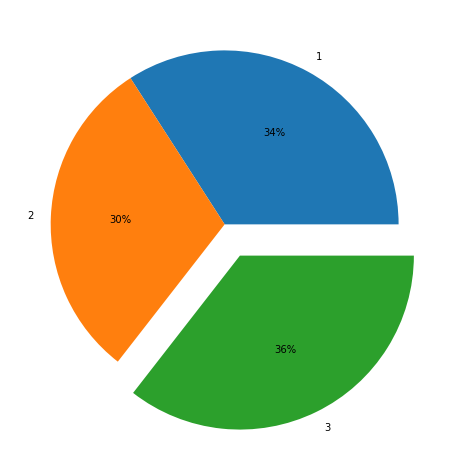

None
promotion
3    10408520.0
1     9993030.0
2     8897930.0
Name: promo_revenue, dtype: float64


In [10]:
#sum of generated revenue by promotion
df.groupby('promotion')['promo_revenue'].sum().plot(kind='pie', figsize=(8,8),
                                                    autopct='%1.0f%%',
                                                   explode=(0,0,0.2))
plt.ylabel('')
print(plt.show())
print(df.groupby('promotion')['promo_revenue'].sum().sort_values(ascending=False))

From a pure descriptive/aggregation perspective, Promotion 3 has generated the most money over four weeks.

How did each promotion perform over the four-week run time?

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

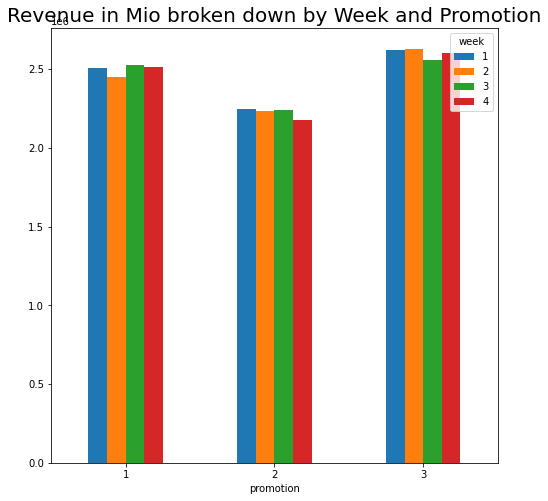

In [11]:
#revenue breakdown by week and promotion
ax=df.groupby(['promotion', 'week'])['promo_revenue'].sum().unstack('week')
ax.plot(kind='bar', figsize=(8,8))
plt.title('Revenue in Mio broken down by Week and Promotion', size=20)
plt.xticks(rotation=0)

We also can get an idea of how the age of the stores is distributed.

Text(0.5, 1.0, 'Age Distribution of Locations')

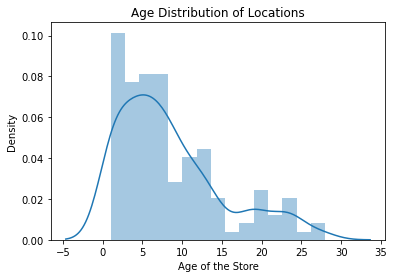

In [12]:
#distribution of age of the book stores
sns.distplot(df.ageofstore, kde=True, bins=15)
plt.xlabel('Age of the Store')
plt.title('Age Distribution of Locations')

We can see that the majority of locations are relativley young, which we can see in the output below

In [13]:
print((round((df.ageofstore.value_counts().sort_values(ascending=False)/len(df.ageofstore))*100))[:8])
print(((round((df.ageofstore.value_counts().sort_values(ascending=False)/len(df.ageofstore))*100))[:8]).sum())

1    15.0
5     8.0
4     8.0
7     7.0
8     7.0
6     7.0
3     6.0
9     5.0
Name: ageofstore, dtype: float64
63.0


We can see, that majority of the data is in the range between 1-8 years

# Comparing the Marketing Campaigns

As already stated, we want to determine which campaign(s) were the most effective one(s) in generating revenue with the new item.
This will be done with an A/B Test, specifically a one-way ANOVA.
Why a one-way ANOVA? We are comparing three different means from three different groups, the means of the revenue from different promotions.
It is very common for statistical tests to have certain assumptions fulfilled to perform a test. This rule also applies to a one-way ANOVA.


The assumptions are:
- Independence

- Equal variance

- Normal distribution

## Independence

To do a one-way ANOVA, we need three or more independent samples where only one variable/single factor is considered.

This is the case in our test. We have three different promotions, and our variable is the revenue generated by the promotions. So we can move on to the next assumption, equal variance.

## Equal variance between groups

In [14]:
df.head()

,marketid,marketsize,locationid,ageofstore,promotion,week,promo_revenue
0,1,Medium,1,4,3,1,33730.0
1,1,Medium,1,4,3,2,35670.0
2,1,Medium,1,4,3,3,29030.0
3,1,Medium,1,4,3,4,39250.0
4,1,Medium,2,5,2,1,27810.0


In [15]:
df.groupby(['promotion'])['promo_revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
promotion,,,,,,,,
1,172.0,58099.011628,16553.781698,30810.0,46352.5,55385.0,63617.5,99650.0
2,188.0,47329.414894,15108.954783,17340.0,38170.0,45385.0,51745.0,88640.0
3,188.0,55364.468085,16766.230774,22180.0,44197.5,51165.0,61732.5,96480.0


When we compare the standard deviations of the promotions we do notice a difference.

<AxesSubplot:xlabel='promotion', ylabel='promo_revenue'>

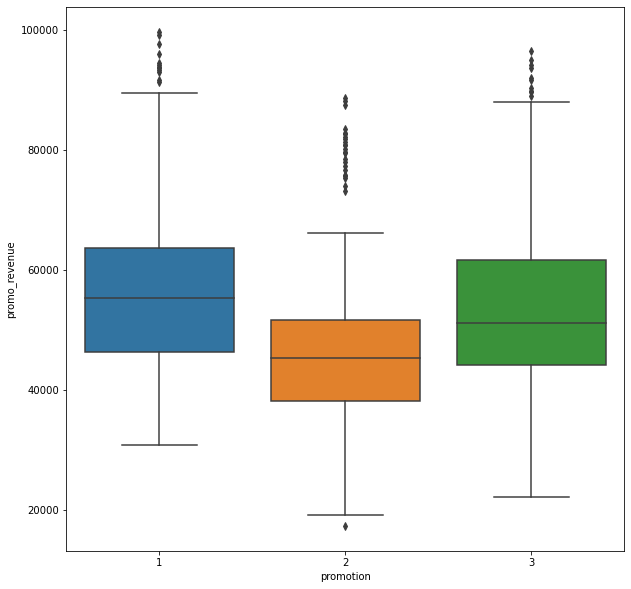

In [16]:
plt.figure(figsize=(10,10))
ax=df[['promotion', 'promo_revenue']]
sns.boxplot(data=ax, x='promotion', y='promo_revenue')

When we compare the boxplots, we see a familiar picture, and the difference between promotions 1 and 3 does not seem dramatic.

To better understand the variance between the three promotions, we calculate the IQR and Levene test.

In [17]:
pro1=df[df.promotion==1]['promo_revenue']
np.percentile(pro1,25)
np.percentile(pro1,75)
IQR1=np.percentile(pro1,75)-np.percentile(pro1,25)
IQR1


pro2=df[df.promotion==2]['promo_revenue']
np.percentile(pro2,25)
np.percentile(pro2,75)
IQR2=np.percentile(pro2,75)-np.percentile(pro2,25)
IQR2


pro3=df[df.promotion==3]['promo_revenue']
np.percentile(pro3,25)
np.percentile(pro3,75)
IQR3=np.percentile(pro3,75)-np.percentile(pro3,25)
IQR3

print(IQR1)
print(IQR2)
print(IQR3)

17265.0
13575.0
17535.0


In [18]:
l1, p1=stats.levene(pro1, pro2, pro3, center='mean')

l2, p2=stats.levene(pro1, pro2, pro3, center='median')

print(l1, p1)
print(l2, p2)

2.159015566629311 0.11642505194921923
1.2696787527507458 0.2817514565692118


We conclude that we have equal variance by comparing the standard deviation, the IQRs and doing a Levene test.

## Normal Distribution

Text(0, 0.5, '')

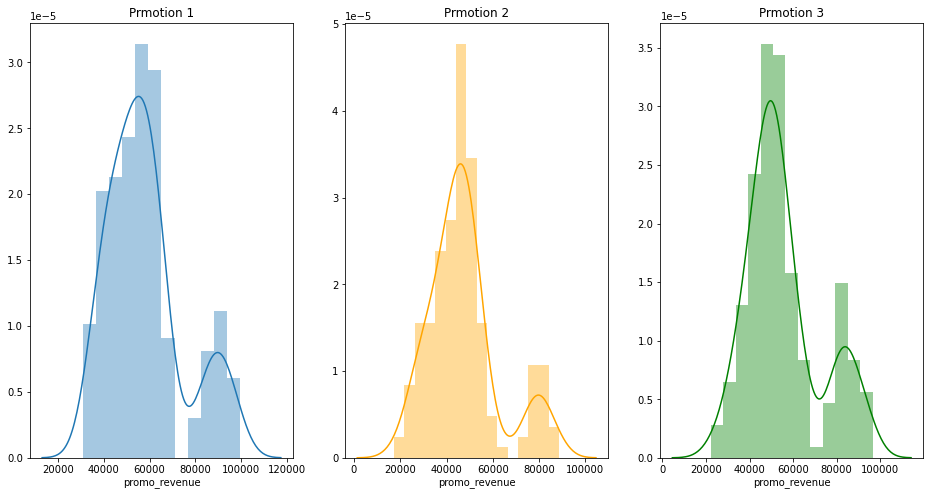

In [19]:
plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
sns.distplot(pro1)
plt.title('Prmotion 1')
plt.ylabel('')

plt.subplot(1,3,2)
sns.distplot(pro2, color='orange')
plt.title('Prmotion 2')
plt.ylabel('')

plt.subplot(1,3,3)
sns.distplot(pro3, color='green')
plt.title('Prmotion 3')
plt.ylabel('')

The first impression of the distributions is that they are non-normally distributed. To be sure that it is the case, we test those distributions for normality with the Kolmogorov-Smirnov test.

Why did I choose this test? We have a sample size bigger than 50.

In [20]:
import scipy.stats as stats
from scipy.stats import kstest
k, p1=kstest(pro1, 'norm', stats.norm.fit(pro1))
k, p2=kstest(pro2, 'norm', stats.norm.fit(pro2))
k, p3=kstest(pro3, 'norm', stats.norm.fit(pro3))
print('{:.40f}'.format(p1))
print('{:.40f}'.format(p2))
print('{:.40f}'.format(p3))

0.0106155210424045479133958735928899841383
0.0008822636596497123416538155282751176856
0.0005963028929948738449465239774838209996


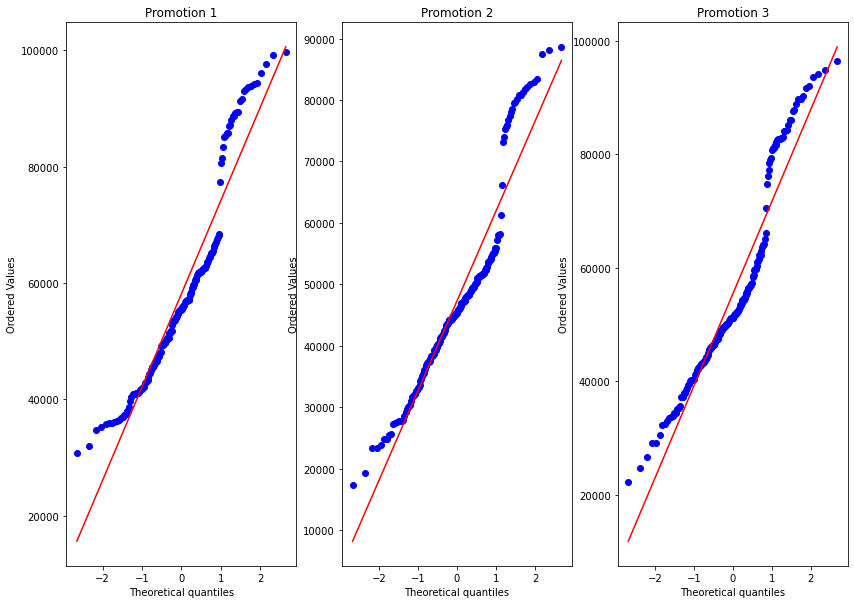

In [21]:
plt.figure(figsize=(14,10))
plt.subplot(1,3,1)
stats.probplot(pro1, dist='norm', plot=plt)
plt.title('Promotion 1')
plt.subplot(1,3,2)
stats.probplot(pro2, dist='norm', plot=plt)
plt.title('Promotion 2')
plt.subplot(1,3,3)
stats.probplot(pro3, dist='norm', plot=plt)
plt.title('Promotion 3')
plt.show()

After performing the normality test and analysing the histogram and Q-Q plot, we see that we are dealing with a non-normal distribution.

So knowing that we have independent samples, equal variance and the assumption of normality is violated, we cannot use a one-way ANOVA. We have to use a non-parametric test, which is, in our case, the Kruskal-Wallis Test.

## Assumptions of Kruskal-Wallis Test

- The variable of interest is continous=> check revenue is continous
- The samples are indepdent=> check
- No normal distribution=> check

This means we can run our analysis by using the Kruskal-Wallis Test.

## Analysis

H0=> There is no difference between the three revenue means.

H1=> There is a statistically significant difference between the three revenue means.

In [22]:
from scipy.stats import kruskal
#Is there a difference between the two means
f, p=kruskal(pro1, pro2, pro3)
print('{:.40f}'.format(p))

0.0000000000026741866266697816091474007501


The outcome of the Kruskal Wallis Test indicates that we have a statistically significant difference between the means of the three promotions.

Next, we will use the Dunn Test to determine which groups are statistically significantly different from each other.

H0=> The mean rank between the two groups is equal.

H1=> The mean rank between the two groups is not equal.

In [23]:
import scikit_posthocs as sp
data=[pro1, pro2, pro3]
result=sp.posthoc_dunn(data, p_adjust='bonferroni')
result<0.05

,1,2,3
1,False,True,False
2,True,False,True
3,False,True,False


Here we can see a statistically significant difference between the groups 2 & 1 and 2 & 3.

But there is no statistically significant difference between 1 & 3. Our goal is to determine which promotion(s) is/are the most effective one(s). To do so, we get the median of each promotion.

In [24]:
df.groupby('promotion')['promo_revenue'].median()

promotion
1    55385.0
2    45385.0
3    51165.0
Name: promo_revenue, dtype: float64

The median will allow us to understand better the Dunn test, which will enable us to answer our questions about which promotion(s) is the most effective one(s). The two most effective promotions are 1 and 3 since they are not statistically significantly different from each other and have the highest medians. Promotion 2 is the least effective. This statement is supported by the fact that promotion 2 has the smallest median, and this promotion is significantly different from the other two promotions.

Next, we want to see how the promotions perform in the different market sizes.

## Testing promotions in different Market sizes
### Small Market Size
#### Equal Variance

In [25]:
pros1=df[(df.promotion==1) & (df.marketsize=='Small')]['promo_revenue']
pros2=df[(df.promotion==2) & (df.marketsize=='Small')]['promo_revenue']
pros3=df[(df.promotion==3) & (df.marketsize=='Small')]['promo_revenue']

<AxesSubplot:xlabel='promotion', ylabel='promo_revenue'>

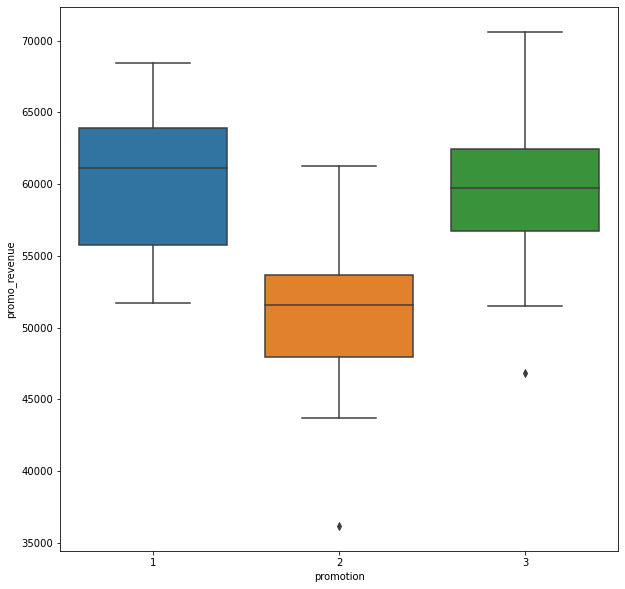

In [26]:
plt.figure(figsize=(10,10))
ax=df[df.marketsize=='Small']
ax=ax[['promotion', 'promo_revenue']]
sns.boxplot(data=ax, x='promotion', y='promo_revenue')

In [27]:
pros1=df[(df.promotion==1) & (df.marketsize=='Small')]['promo_revenue']
np.percentile(pros1,25)
np.percentile(pros1,75)
IQR1=np.percentile(pros1,75)-np.percentile(pros1,25)
IQR1

pros2=df[(df.promotion==2) & (df.marketsize=='Small')]['promo_revenue']
np.percentile(pros2,25)
np.percentile(pros2,75)
IQR2=np.percentile(pros2,75)-np.percentile(pros2,25)
IQR2


pros3=df[(df.promotion==3) & (df.marketsize=='Small')]['promo_revenue']
np.percentile(pros3,25)
np.percentile(pros3,75)
IQR3=np.percentile(pros3,75)-np.percentile(pros3,25)
IQR3

print(IQR1)
print(IQR3)
print(IQR2)

8110.0
5720.0
5760.0


In [28]:
ls1, ps1=stats.levene(pros1, pros2, pros3, center='mean')

ls2, ps2=stats.levene(pros1, pros2, pros3, center='median')

print(ls1, ps1)
print(ls2, ps2)

0.09042080912932386 0.9136774450676184
0.06363402963211741 0.9384149081167994


In [29]:
dfs=df[df.marketsize=='Small']
dfs.groupby(['promotion', 'marketsize'])['promo_revenue'].describe()

,,count,mean,std,min,25%,50%,75%,max
promotion,marketsize,,,,,,,,
1,Small,20.0,60162.500000,5127.278826,51720.0,55780.0,61145.0,63890.0,68420.0
2,Small,16.0,50810.625000,5869.815975,36170.0,47920.0,51600.0,53680.0,61250.0
3,Small,24.0,59514.166667,5212.686795,46830.0,56715.0,59745.0,62435.0,70600.0


As we can see, we do have equal variance between the three promotions.

#### Normal Distribution

Text(0, 0.5, '')

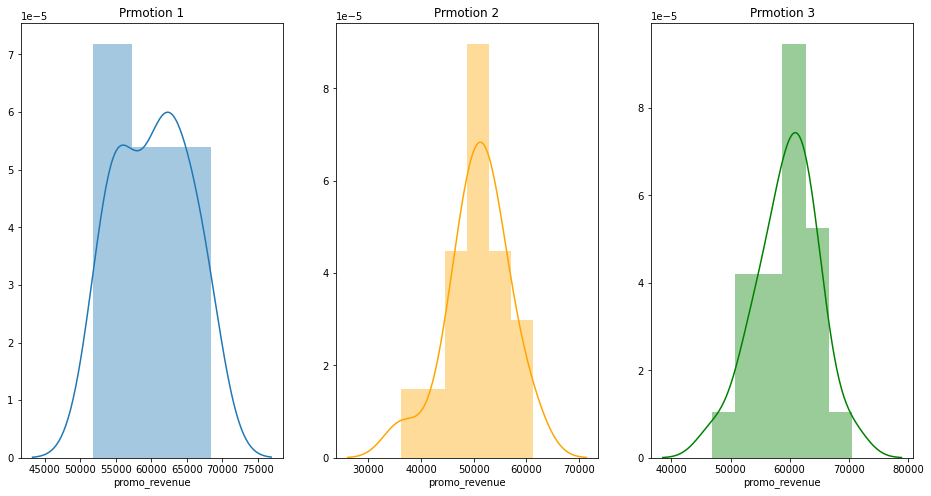

In [30]:
plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
sns.distplot(pros1)
plt.title('Prmotion 1')
plt.ylabel('')

plt.subplot(1,3,2)
sns.distplot(pros2, color='orange')
plt.title('Prmotion 2')
plt.ylabel('')

plt.subplot(1,3,3)
sns.distplot(pros3, color='green')
plt.title('Prmotion 3')
plt.ylabel('')

Due to the small sample size, all promotions have a count below 50 in the small market segment. I will use the Shapiro-Wilk Test to test for normality.

In [31]:
from scipy.stats import shapiro
s, ss1=shapiro(pros1)
s, ss2=shapiro(pros2)
s, ss3=shapiro(pros3)
print('{:.40f}'.format(ss1))
print('{:.40f}'.format(ss2))
print('{:.40f}'.format(ss3))

0.3193163573741912841796875000000000000000
0.6836715340614318847656250000000000000000
0.9239183664321899414062500000000000000000


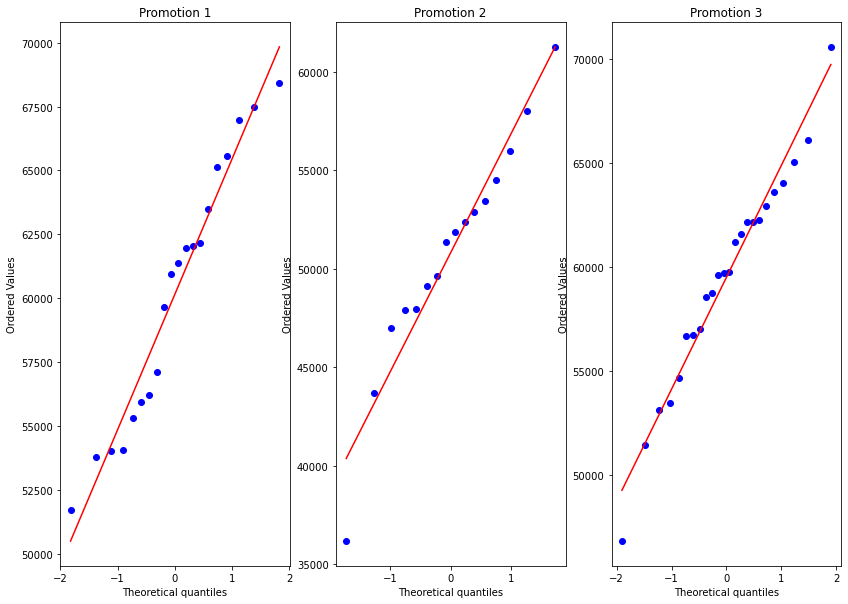

In [32]:
plt.figure(figsize=(14,10))
plt.subplot(1,3,1)
stats.probplot(pros1, dist='norm', plot=plt)
plt.title('Promotion 1')
plt.subplot(1,3,2)
stats.probplot(pros2, dist='norm', plot=plt)
plt.title('Promotion 2')
plt.subplot(1,3,3)
stats.probplot(pros3, dist='norm', plot=plt)
plt.title('Promotion 3')
plt.show()

We do have equal variance and normal distribution. Therefore we will be able to use a one-way ANOVA.

#### Analysis of the Small Market Size

H0=> There is no difference between the three revenue means.

H1=> There is a statistically significant difference between the three revenue means.

In [33]:
#one-way ANOVA
from scipy.stats import f_oneway
fs, ps=f_oneway(pros1, pros2, pros3)
print('{:.40f}'.format(ps))

0.0000021159399958414258688507627453878612


The outcome of the one-way ANOVA indicates that there is a statistically significant difference between the revenue of the three promotions.

Because we have equal variance between the three promotions, we can use the Tukey HSD as a post-hoc test.

H0=> The mean rank between the two groups is equal.

H1=> The mean rank between the two groups is not equal.

In [34]:
#Post-hoc test Tuky HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd
df2=df[df.marketsize=='Small']
promo=df2.promo_revenue
group=df2.promotion
tukey=pairwise_tukeyhsd(endog=promo, groups=group, alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff p-adj     lower      upper    reject
------------------------------------------------------------
     1      2 -9351.875    0.0 -13682.9926 -5020.7574   True
     1      3 -648.3333 0.9161  -4557.9073  3261.2407  False
     2      3 8703.5417    0.0   4535.9218 12871.1615   True
------------------------------------------------------------


Here we can see a statistically significant difference between the groups 2 & 1 and 2 & 3.
But there is no statistically significant difference between 1 & 3.

In [35]:
dfs=df[df['marketsize']=='Small']
dfs.groupby('promotion')['promo_revenue'].median()

promotion
1    61145.0
2    51600.0
3    59745.0
Name: promo_revenue, dtype: float64

The median will allow us to better understand the outcome of the Tuky HSD test, which will enable us to answer our questions about which promotion(s) is the most effective one(s). The two most effective promotions are 1 and 3 since they are not statistically significantly different from each other and have the highest medians. Promotion 2 is the least effective. This statement is supported by the fact that promotion 2 has the smallest median, and this promotion is significantly different from the other two promotions.

Next, we want to see how the promotions perform in the medium market size.

### Medium Market Size
#### Equal Variance

In [36]:
prom1=df[(df.promotion==1) & (df.marketsize=='Medium')]['promo_revenue']
prom2=df[(df.promotion==2) & (df.marketsize=='Medium')]['promo_revenue']
prom3=df[(df.promotion==3) & (df.marketsize=='Medium')]['promo_revenue']

<AxesSubplot:xlabel='promotion', ylabel='promo_revenue'>

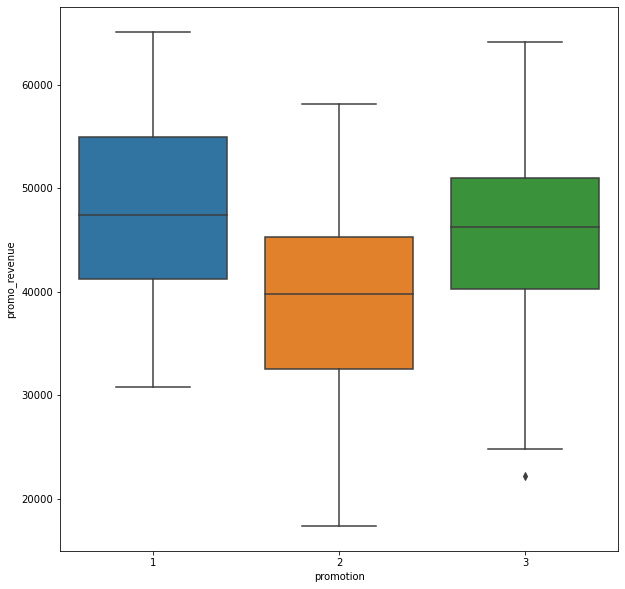

In [37]:
plt.figure(figsize=(10,10))
ax=df[df.marketsize=='Medium']
ax=ax[['promotion', 'promo_revenue']]
sns.boxplot(data=ax, x='promotion', y='promo_revenue')

In [38]:
prom1=df[(df.promotion==1) & (df.marketsize=='Medium')]['promo_revenue']
np.percentile(prom1,25)
np.percentile(prom1,75)
IQR1=np.percentile(prom1,75)-np.percentile(prom1,25)
IQR1

prom2=df[(df.promotion==2) & (df.marketsize=='Medium')]['promo_revenue']
np.percentile(prom2,25)
np.percentile(prom2,75)
IQR2=np.percentile(prom2,75)-np.percentile(prom2,25)
IQR2


prom3=df[(df.promotion==3) & (df.marketsize=='Medium')]['promo_revenue']
np.percentile(prom3,25)
np.percentile(prom3,75)
IQR3=np.percentile(prom3,75)-np.percentile(prom3,25)
IQR3

print(IQR1)
print(IQR3)
print(IQR2)

13775.0
10750.0
12820.0


In [39]:
lm1, pm1=stats.levene(prom1, prom2, prom3, center='mean')

lm2, pm2=stats.levene(prom1, prom2, prom3, center='median')

print(lm1, pm1)
print(lm2, pm2)

0.7984020251765307 0.4509504183899352
0.8597064595109003 0.4242708096568547


In [40]:
dfm=df[df.marketsize=='Medium']
dfm.groupby(['promotion', 'marketsize'])['promo_revenue'].describe()

,,count,mean,std,min,25%,50%,75%,max
promotion,marketsize,,,,,,,,
1,Medium,96.0,47672.604167,8067.330511,30810.0,41215.0,47425.0,54990.0,65110.0
2,Medium,108.0,39114.351852,8807.406959,17340.0,32510.0,39765.0,45330.0,58100.0
3,Medium,116.0,45468.879310,8091.366174,22180.0,40280.0,46295.0,51030.0,64140.0


As we can see, we do have equal variance between the three promotions.

#### Normal Distribution

Text(0, 0.5, '')

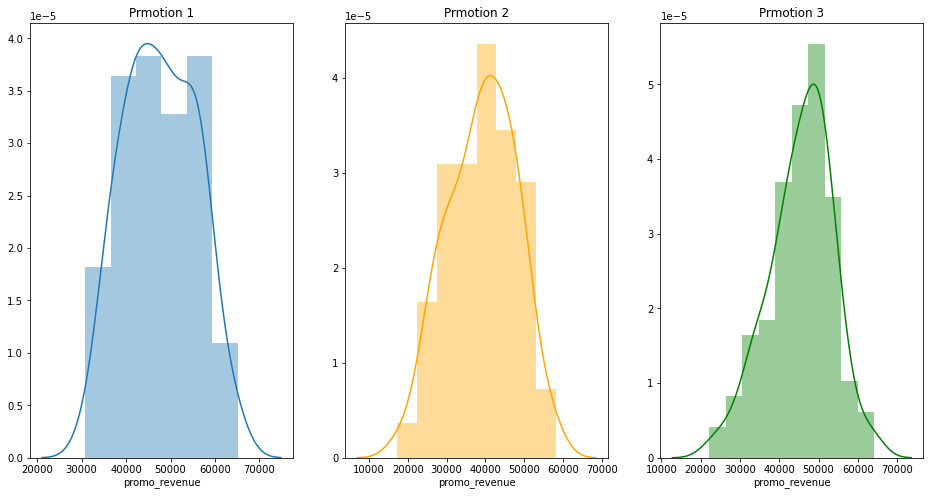

In [41]:
plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
sns.distplot(prom1)
plt.title('Prmotion 1')
plt.ylabel('')

plt.subplot(1,3,2)
sns.distplot(prom2, color='orange')
plt.title('Prmotion 2')
plt.ylabel('')

plt.subplot(1,3,3)
sns.distplot(prom3, color='green')
plt.title('Prmotion 3')
plt.ylabel('')

In [42]:
k, pm1=kstest(prom1, 'norm', stats.norm.fit(prom1))
k, pm2=kstest(prom2, 'norm', stats.norm.fit(prom2))
k, pm3=kstest(prom3, 'norm', stats.norm.fit(prom3))
print('{:.40f}'.format(pm1))
print('{:.40f}'.format(pm2))
print('{:.40f}'.format(pm3))

0.5401885590690036487160341494018211960793
0.8191924527314711212966358289122581481934
0.6492914467618888796351939163287170231342


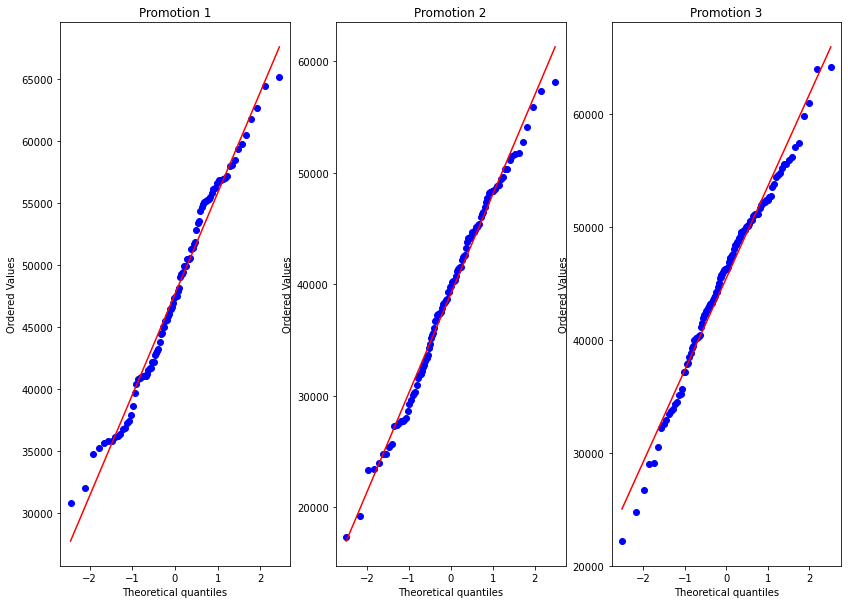

In [43]:
plt.figure(figsize=(14,10))
plt.subplot(1,3,1)
stats.probplot(prom1, dist='norm', plot=plt)
plt.title('Promotion 1')
plt.subplot(1,3,2)
stats.probplot(prom2, dist='norm', plot=plt)
plt.title('Promotion 2')
plt.subplot(1,3,3)
stats.probplot(prom3, dist='norm', plot=plt)
plt.title('Promotion 3')
plt.show()

We have equal variance and normal distribution, so we can do a one-way ANOVA.

#### Analysis of the Medium Makret Size

H0=> There is no difference between the three revenue means.

H1=> There is a statistically significant difference between the three revenue means.

In [44]:
#one-way ANOVA
fm, pm=f_oneway(prom1, prom2, prom3)
print('{:.40f}'.format(pm))

0.0000000000015197404971604578169274455716


The outcome of the one-way ANOVA indicates that there is a statistically significant difference between the revenue of the three promotions.

Because we have equal variance between the three promotions, we can use the Tukey HSD as a post-hoc test.

H0=> The mean rank between the two groups is equal.

H1=> The mean rank between the two groups is not equal.

In [45]:
#post-hoc Tuskey HSD
df3=df[df.marketsize=='Medium']
promom=df3.promo_revenue
groupm=df3.promotion
tukey=pairwise_tukeyhsd(endog=promom, groups=groupm, alpha=0.05)
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------
     1      2 -8558.2523    0.0 -11310.6812 -5805.8234   True
     1      3 -2203.7249 0.1356  -4911.1212   503.6715  False
     2      3  6354.5275    0.0   3730.7218  8978.3331   True
-------------------------------------------------------------


Here we can see a statistically significant difference between groups  2 & 1 and 2 & 3.

But there is no statistically significant difference between 1 & 3. To better understand how each promotion performed, we look at each promotion's median.

In [46]:
df3=df[df['marketsize']=='Medium']
df3.groupby('promotion')['promo_revenue'].median()

promotion
1    47425.0
2    39765.0
3    46295.0
Name: promo_revenue, dtype: float64

The median will allow us to understand better the Tukey HSD test, which will enable us to answer our questions about which promotion(s) is/are the most effective one(s). The two most effective promotions are 1 and 3 since they are not statistically significant different from each other and have the highest medians. Promotion 2 is the least effective. This statement is supported by the fact that promotion 2 has the smallest median, and this promotion is significantly different from the other two promotions.

Next, we want to see how the promotions perform in the large market sizes.

### Large Market Size
#### Equal Variance

In [47]:
prol1=df[(df.promotion==1) & (df.marketsize=='Large')]['promo_revenue']
prol2=df[(df.promotion==2) & (df.marketsize=='Large')]['promo_revenue']
prol3=df[(df.promotion==3) & (df.marketsize=='Large')]['promo_revenue']

<AxesSubplot:xlabel='promotion', ylabel='promo_revenue'>

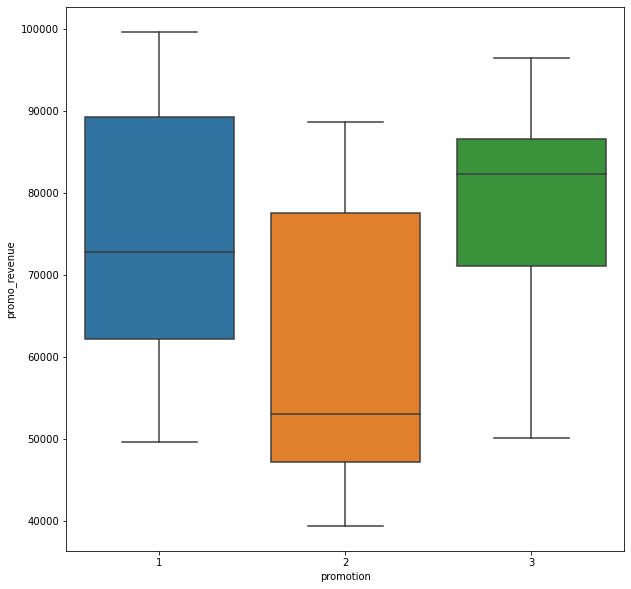

In [48]:
plt.figure(figsize=(10,10))
ax=df[df.marketsize=='Large']
ax=ax[['promotion', 'promo_revenue']]
sns.boxplot(data=ax, x='promotion', y='promo_revenue')

In [49]:
prol1=df[(df.promotion==1) & (df.marketsize=='Large')]['promo_revenue']
np.percentile(prol1,25)
np.percentile(prol1,75)
IQR1=np.percentile(prol1,75)-np.percentile(prol1,25)
IQR1

prol2=df[(df.promotion==2) & (df.marketsize=='Large')]['promo_revenue']
np.percentile(prol2,25)
np.percentile(prol2,75)
IQR2=np.percentile(prol2,75)-np.percentile(prol2,25)
IQR2


prol3=df[(df.promotion==3) & (df.marketsize=='Large')]['promo_revenue']
np.percentile(prol3,25)
np.percentile(prol3,75)
IQR3=np.percentile(prol3,75)-np.percentile(prol3,25)
IQR3

print(IQR1)
print(IQR3)
print(IQR2)

27032.5
15407.5
30380.0


In [50]:
ll1, pl1=stats.levene(prol1, prol2, prol3, center='mean')

ll2, pl2=stats.levene(prol1, prol2, prol3, center='median')

print(ll1, pl1)
print(ll2, pl2)

2.9876750427942977 0.053138771618773846
2.1946700879832224 0.11463681252166026


In [51]:
dfl=df[df.marketsize=='Large']
dfl.groupby(['promotion', 'marketsize'])['promo_revenue'].describe()

,,count,mean,std,min,25%,50%,75%,max
promotion,marketsize,,,,,,,,
1,Large,56.0,75235.892857,15497.497015,49620.0,62235.0,72835.0,89267.5,99650.0
2,Large,64.0,60322.031250,15728.529349,39360.0,47165.0,53010.0,77545.0,88640.0
3,Large,48.0,77203.958333,14400.304184,50050.0,71122.5,82345.0,86530.0,96480.0


As we can see, we do have equal variance between the three promotions.

#### Normal Distribution

Text(0, 0.5, '')

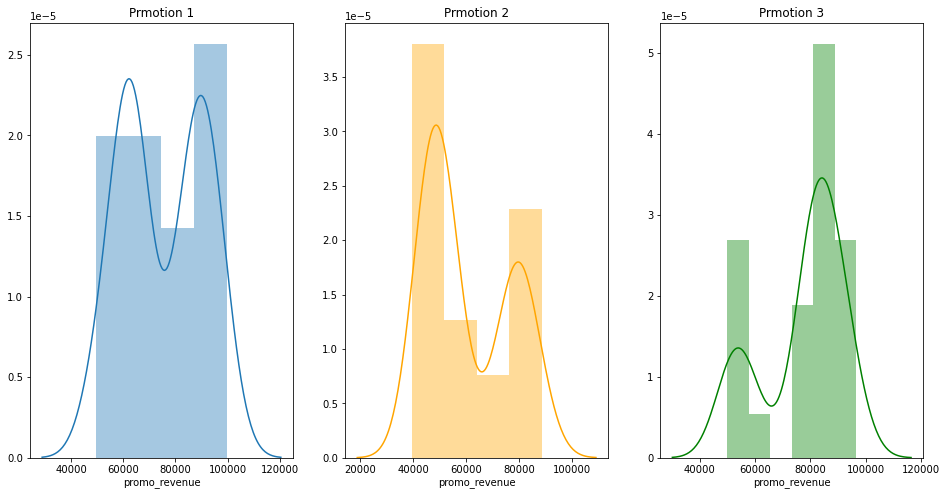

In [52]:
plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
sns.distplot(prol1)
plt.title('Prmotion 1')
plt.ylabel('')

plt.subplot(1,3,2)
sns.distplot(prol2, color='orange')
plt.title('Prmotion 2')
plt.ylabel('')

plt.subplot(1,3,3)
sns.distplot(prol3, color='green')
plt.title('Prmotion 3')
plt.ylabel('')

In [53]:
s, sl1=shapiro(prol1)
s, sl2=shapiro(prol2)
s, sl3=shapiro(prol3)
print('{:.40f}'.format(sl1))
print('{:.40f}'.format(sl2))
print('{:.40f}'.format(sl3))

0.0002080676495097577571868896484375000000
0.0000009793799335966468788683414459228516
0.0000122865831144736148416996002197265625


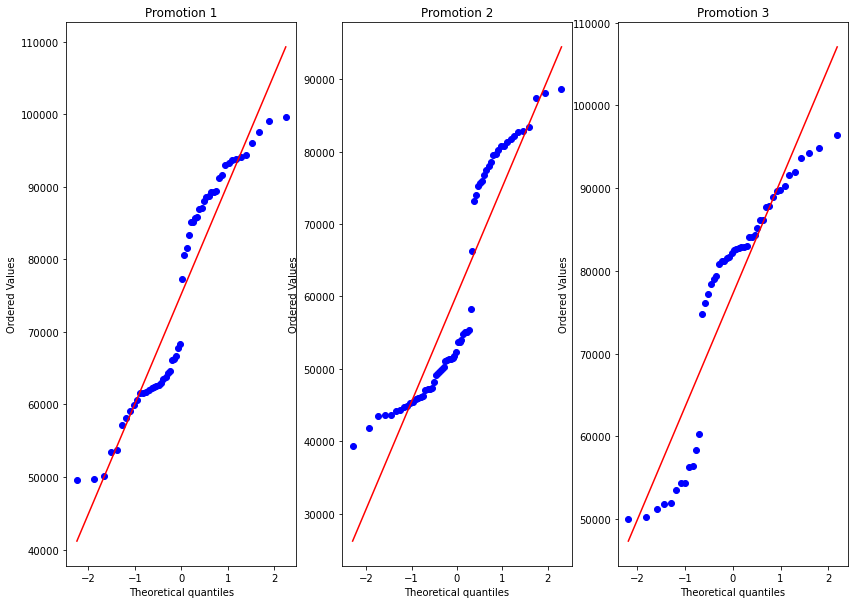

In [54]:
plt.figure(figsize=(14,10))
plt.subplot(1,3,1)
stats.probplot(prol1, dist='norm', plot=plt)
plt.title('Promotion 1')
plt.subplot(1,3,2)
stats.probplot(prol2, dist='norm', plot=plt)
plt.title('Promotion 2')
plt.subplot(1,3,3)
stats.probplot(prol3, dist='norm', plot=plt)
plt.title('Promotion 3')
plt.show()

We have equal variance and a non-normal distribution. Therefore we use the Kruskal-Wallis Test.

#### Analysis of Large Market Size

H0=> There is no difference between the three revenue means.

H1=> There is a statistically significant difference between the three revenue means.

In [55]:
#Kruskal-Wallis test
fl, pl=kruskal(prol1, prol2, prol3)
print('{:.40f}'.format(pl))

0.0000000012317833529430419207250067294406


The outcome of the Kruskal-Wallis test indicates that there is a statistically significant difference between the revenue of the three promotions.

H0=> The mean rank between the two groups is equal.

H1=> The mean rank between the two groups is not equal.

In [56]:
#Post-hoc Dunn test
datal=[prol1, prol2, prol3]
resultsl=sp.posthoc_dunn(datal, p_adjust='bonferroni')
resultsl<0.05

,1,2,3
1,False,True,False
2,True,False,True
3,False,True,False


Here we can see a statistically significant difference between the groups 2 & 1 and 2 & 3.

But there is no statistically significant difference between 1 & 3. Our goal is to determine which promotion(s) is/are the most effective one(s). To do so, we get the median of each promotion.

In [57]:
df4=df[df['marketsize']=='Large']
df4.groupby('promotion')['promo_revenue'].median()

promotion
1    72835.0
2    53010.0
3    82345.0
Name: promo_revenue, dtype: float64

The median will allow us to understand better the Dunn test, which will enable us to answer our questions about which promotion(s) is the most effective one(s). The two most effective promotions are 1 and 3 since they are not statistically significantly different from each other and have the highest medians. Promotion 2 is the least effective. This statement is supported by the fact that promotion 2 has the smallest median, and this promotion is significantly different from the other two promotions.

# Conclusion

The outcome of the A/B test has shown that the fast food company can go with promotion 1 or promotion 3. We could not find a statistically significant difference between promotion 1 and promotion 3, but we could find a statistically signfificant difference between promotion 1 & promotion 2 and promotion 2 & promotion 3. This is supported by the medians of each promotion. Here we can see that promotion 1 and 3 have the biggest medians.

When we did the analysis for each market size we came to the same conclusion. The fast food company can go with either promotion 1 or promotion 3. Both these promotions perform better than promotion 2.

###### Recommendations:
The runtime of the test could be extended to get more accurate/reliable data.